# NumPy

Czym jest [numpy](https://numpy.org/)?

Z dokumentacji:

It provides:

* a powerful N-dimensional array object
* sophisticated (broadcasting) functions
* tools for integrating C/C++ and Fortran code
* useful linear algebra, Fourier transform, and random number capabilities

Najważniejsza struktura danych w NumPy to `ndarray`, która ma stałą długość i przechowuje elementy tego samego typu. Mówimy, że Python jest wolny - jest to prawda tylko, jeżeli chodzi o iterowanie przez małe pythonowe obiekty. Numpy wykorzystuje szybkie implementacje w C i FORTRANIE, by pracować na tablicach `ndarray`.

[Opracowano na podstawie tutorialu na UAB, Barcelona]

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Porównanie implementacji

In [2]:
voltages = [10.1, 15.1, 9.5]
resistances = [1.2, 2.4, 5.2]

currents = [U * R for U, R in zip(voltages, resistances)]
currents

[12.12, 36.239999999999995, 49.4]

In [5]:
# list(zip(voltages, resistances))

[(10.1, 1.2), (15.1, 2.4), (9.5, 5.2)]

In [3]:
U = np.array([10.1, 15.1, 9.5])
R = np.array([1.2, 2.4, 5.2])

I = U * R
I

array([12.12, 36.24, 49.4 ])

In [4]:
type(U)

numpy.ndarray

In [6]:
currents[1] == I[1]

True

### Znajdowanie najbliższego punktu w tablicy

In [9]:
import math

def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

point = (1, 2)
points = [(3, 2), (4, 2), (3, 0)]

min_distance = float('inf')
for other in points:
#     print(other)
    distance = euclidean_distance(point, other)
    if distance < min_distance:
        closest = other
        min_distance = distance 

print(min_distance, closest)

2.0 (3, 2)


In [25]:
point = np.array([1, 2])
points = np.array([(3, 2), (4, 2), (3, 0)])

distance = np.linalg.norm(point - points, axis=1)
idx = np.argmin(distance)

print(distance[idx], points[idx])

2.0 [3 2]


### Pomiary czasu

In [27]:
def mean(data):   
    n = 0
    total = 0.0
    
    if len(data) < 2:
        return float('nan')

    for value in data:
        n += 1
        total += value

    return total / n

In [28]:
%%timeit -n100

l = list(range(2000))  # list with elements with values from 0,...,1999
mean(l)

166 µs ± 21.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [29]:
%%timeit -n100

a = np.arange(2000)  # array with numbers 0,...,1999
np.mean(a)

17.2 µs ± 8.63 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
import math

def var(data):
    '''
    Welford's algorithm for one-pass calculation of the variance
    Avoids rounding errors of large numbers when doing the naive
    approach of `sum(v**2 for v in data) - sum(v)**2`
    '''
    # https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Welford's_online_algorithm
    n = 0
    mean = 0.0
    m2 = 0.0
    
    if len(data) < 2:
        return float('nan')

    for value in data:
        n += 1
        delta = value - mean
        mean += delta / n
        delta2 = value - mean
        m2 += delta * delta2

    return m2 / n 

In [33]:
%%timeit -n100

l = list(range(2000))  # list with elements with values from 0,...,1999
var(l)

345 µs ± 21.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [34]:
%%timeit -n100

a = np.arange(2000)  # array with numbers 0,...,1999

np.var(a)

36.3 µs ± 13.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Wektoryzacja podstawowych operacji

In [35]:
# create a numpy array from a python list
a = np.array([1.0, 3.5, 7.1, 4, 6])
a

array([1. , 3.5, 7.1, 4. , 6. ])

In [43]:
print(type(a))
print(a.shape)
print(a.dtype)

<class 'numpy.ndarray'>
(5,)
float64


In [36]:
a*a

array([ 1.  , 12.25, 50.41, 16.  , 36.  ])

In [37]:
a**2

array([ 1.  , 12.25, 50.41, 16.  , 36.  ])

In [38]:
a**a

array([1.00000000e+00, 8.02117802e+01, 1.10645633e+06, 2.56000000e+02,
       4.66560000e+04])

In [39]:
math.cos(a) # Nie zadziała

TypeError: only size-1 arrays can be converted to Python scalars

In [44]:
np.cos(a)

array([ 0.54030231, -0.93645669,  0.68454667, -0.65364362,  0.96017029])

Pozdtawowe funkcje zaimplementowanie w pythonie zadziałają dzięki przeciążeniu.

In [45]:
def poly(x):
    return x + 2 * x**2 - x**3

poly(a)

array([   2.   ,  -14.875, -249.991,  -28.   , -138.   ])

In [46]:
poly(5)

-70

In [47]:
poly(np.array([5,10,20]))

array([  -70,  -790, -7180])

In [48]:
poly(np.pi)

-8.125475224531307

### Użyteczne atrybuty

In [49]:
len(a)

5

In [50]:
a.shape

(5,)

In [51]:
a.dtype

dtype('float64')

In [52]:
a.ndim

1

### Tablice dwuwymiarowe

In [55]:
# two-dimensional array
y = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

y + y

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [56]:
## since python 3.5 @ is matrix product
y @ y

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

In [57]:
# Broadcasting, changing array dimensions to fit the larger one
# Description of numpy broadcating rules:
# https://numpy.org/doc/stable/user/basics.broadcasting.html
y + np.array([1, 2, 3])

array([[ 2,  4,  6],
       [ 5,  7,  9],
       [ 8, 10, 12]])

In [58]:
10. + y 

array([[11., 12., 13.],
       [14., 15., 16.],
       [17., 18., 19.]])

### Różne operacje redukcji

In [59]:
x = np.random.normal(0, 1, size=10)

In [60]:
x

array([ 0.57869166,  1.21057913,  0.13079285,  0.63289016,  0.01839221,
       -0.91180537, -0.28987743,  0.089721  ,  0.56173114,  0.92889768])

In [62]:
np.sum(x)

2.950013030072819

In [63]:
np.prod(x)

1.3197563339737132e-05

In [64]:
np.mean(x)

0.2950013030072819

Odchylenie standardowe populacji

In [65]:
np.std(x)

0.5873656235966198

Odchylenie standardowe średniej

In [66]:
np.std(x, ddof=1) / np.sqrt(len(x))

0.1957885411988733

Odchylenie standardowe próbki

In [67]:
np.std(x, ddof=1)

0.6191377299501534

Różnica sąsiadujących elementów

In [68]:
z = np.arange(10)**2
z

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [69]:
np.diff(z)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17])

### Operacje redukcji na tablicach wielowymiarowych

In [83]:
array2d = np.arange(20).reshape(4,5)

array2d

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [78]:
array2d.shape

(4, 5)

In [75]:
np.sum(array2d, axis=0)

array([30, 34, 38, 42, 46])

In [76]:
np.mean(array2d, axis=1)

array([ 2.,  7., 12., 17.])

In [77]:
np.mean(array2d)

9.5

## Exercise 1

Napisz funkcję która wyznacza regresję liniową mając dane wektory x i y.

Przypomnienie:

$$ f(x) = a \cdot x + b$$

z 

$$
\hat{a} = \frac{\mathrm{Cov}(x, y)}{\mathrm{Var}(x)} \\
\hat{b} = \bar{y} - \hat{a} \cdot \bar{x}
$$

In [93]:
def linear_regression(x,y):
    ## TODO: implement
    ## use np.cov and np.mean
    a = np.cov(x,y)[0,1] / np.var(x)
    b = np.mean(y) - a*np.mean(x)
    return a,b

4.488912190417601 2.1537290794284987


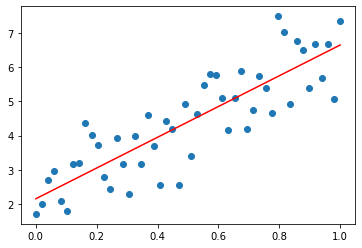

In [95]:
x = np.linspace(0, 1, 50)
y = 5 * np.random.normal(x, 0.2) + 2  # see section on random numbers later
# y = 5 * x + 2
a,b = linear_regression(x,y)

plt.scatter(x, y)
plt.plot(x, (a * x) + b,'r')
print(a,b)

### Tworzenie tablic

In [96]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [97]:
np.ones((5, 2))

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [103]:
np.full((5,5), np.nan)

array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]])

In [104]:
np.empty(5)  # Uwaga: niezainicjalizowana przestrzeń w pamięci

array([1.61271680e-312, 2.44029516e-312, 2.05833592e-312, 2.12199579e-312,
       2.05833592e-312])

In [105]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [109]:
np.arange(0, 10, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [110]:
np.logspace(-4, 5, 10)

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04, 1.e+05])

### Indeksowanie tablic
* dostęp do elementów
* 'slicing'

In [118]:
x = np.arange(0, 10)
print(x)
# like lists:
x[4]

[0 1 2 3 4 5 6 7 8 9]


4

In [112]:
# all elements with indices ≥1 and <4:
x[1:4]

array([1, 2, 3])

In [113]:
# negative indices count from the end
x[-1], x[-2]

(9, 8)

In [114]:
# combination:
x[3:-2]

array([3, 4, 5, 6, 7])

In [119]:
# step size
x[::2]

array([0, 2, 4, 6, 8])

In [120]:
# trick for reversal: negative step
x[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [121]:
y = np.array([x, x + 10, x + 20, x + 30])
y

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]])

In [122]:
y[2,5]

25

In [123]:
# comma between indices
y[3, 2:-1]

array([32, 33, 34, 35, 36, 37, 38])

In [124]:
# only one index ⇒ one-dimensional array
y[2]

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [125]:
# other axis: (: alone means the whole axis)
y[:, 3]

array([ 3, 13, 23, 33])

In [126]:
# inspecting the number of elements per axis:
y.shape

(4, 10)

In [132]:
y3d = np.arange(60).reshape((5,3,4))
print(y3d)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]

 [[24 25 26 27]
  [28 29 30 31]
  [32 33 34 35]]

 [[36 37 38 39]
  [40 41 42 43]
  [44 45 46 47]]

 [[48 49 50 51]
  [52 53 54 55]
  [56 57 58 59]]]


In [138]:
# Ellipsis object: https://docs.python.org/dev/library/constants.html#Ellipsis
y3d[...,0] # == y3d[:,:,0]

array([[ 0,  4,  8],
       [12, 16, 20],
       [24, 28, 32],
       [36, 40, 44],
       [48, 52, 56]])

### Napisywanie elementów tablicy

In [139]:
y

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]])

In [140]:
y[:, 3] = 0
y

array([[ 0,  1,  2,  0,  4,  5,  6,  7,  8,  9],
       [10, 11, 12,  0, 14, 15, 16, 17, 18, 19],
       [20, 21, 22,  0, 24, 25, 26, 27, 28, 29],
       [30, 31, 32,  0, 34, 35, 36, 37, 38, 39]])

'Slicing' z obydwu stron

In [143]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [144]:
y[:,0] = x[3:7]
y

array([[ 3,  1,  2,  0,  4,  5,  6,  7,  8,  9],
       [ 4, 11, 12,  0, 14, 15, 16, 17, 18, 19],
       [ 5, 21, 22,  0, 24, 25, 26, 27, 28, 29],
       [ 6, 31, 32,  0, 34, 35, 36, 37, 38, 39]])

Transpozycja

In [145]:
y

array([[ 3,  1,  2,  0,  4,  5,  6,  7,  8,  9],
       [ 4, 11, 12,  0, 14, 15, 16, 17, 18, 19],
       [ 5, 21, 22,  0, 24, 25, 26, 27, 28, 29],
       [ 6, 31, 32,  0, 34, 35, 36, 37, 38, 39]])

In [146]:
y.shape

(4, 10)

In [147]:
y.T

array([[ 3,  4,  5,  6],
       [ 1, 11, 21, 31],
       [ 2, 12, 22, 32],
       [ 0,  0,  0,  0],
       [ 4, 14, 24, 34],
       [ 5, 15, 25, 35],
       [ 6, 16, 26, 36],
       [ 7, 17, 27, 37],
       [ 8, 18, 28, 38],
       [ 9, 19, 29, 39]])

In [148]:
y.T.shape

(10, 4)

### Wykorzystanie mask

Tablica wypełniona wartościami logicznymi może być wykorzystana do dostępu do wybranych wartości i w innej tablicy.

In [151]:
a = np.linspace(0, 2, 11)
b = np.random.normal(0, 1, 11)
print(a)
print(b)
print(b >= 0)


[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
[ 1.64969935 -1.57095564 -0.68056302 -1.10074626  0.35431538  0.12766586
  0.36818341  0.30270569  0.71763992 -1.02353118 -0.21480644]
[ True False False False  True  True  True  True  True False False]


In [152]:
print(a[b >= 0])

[0.  0.8 1.  1.2 1.4 1.6]


In [154]:
b[b < 0] = 0
b

array([1.64969935, 0.        , 0.        , 0.        , 0.35431538,
       0.12766586, 0.36818341, 0.30270569, 0.71763992, 0.        ,
       0.        ])

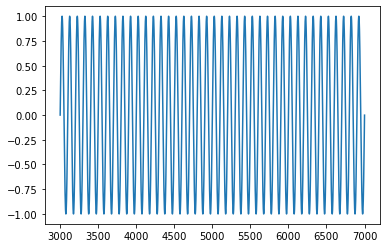

In [155]:
x = np.arange(3000,7000,0.01)
period = 100
y = np.sin(2*np.pi/period * x)

plt.plot(x,y)

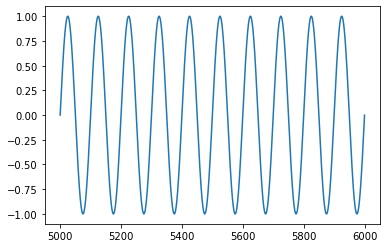

In [158]:
mask= (x > 5000) & (x < 6000)
x_part = x[mask]
y_part = y[mask]
plt.plot(x_part, y_part)

### Liczby losowe
* wiele wbudowanych rozkładów

In [159]:
np.random.uniform(0, 1, 5)

array([0.65629983, 0.46496767, 0.05071894, 0.16958582, 0.88466833])

In [163]:
np.random.normal(5, 10, (2,5,6))

array([[[ -8.00832678,  11.98073628,   5.5169454 ,  -8.39284616,
           0.61491333,   7.91052577],
        [-12.41814019,   1.83635878,   8.58995219,  -0.65400182,
          14.70680874,   0.98656777],
        [  5.52105561,   8.20181504,  -4.0094077 ,   3.17921646,
          -0.12171691,   5.9201547 ],
        [ 19.01005087,  16.78657114,   4.93352783,   3.6158527 ,
           1.28064485,  14.31054187],
        [ 12.41835277,  -4.63358653,   7.41128001,  -0.75475941,
          13.85221711,   8.1739591 ]],

       [[  5.34493243,  10.89728795,  17.10466864,  13.88356733,
          -3.14966357,   3.90692325],
        [ 14.74310492, -12.88430501,  14.95987899,  -8.35746611,
          14.72999858,  -2.30217013],
        [  2.24154057,   4.82188007,  28.25784828,  -7.07411643,
         -11.09081   ,   6.16464342],
        [ 27.26884487,  -2.93616461,   3.24137158,  11.94081038,
          -7.22121013,   9.95819432],
        [ 11.01759635,   4.33426096,  22.30024514,   7.26551991,
      

In [164]:
np.random.normal()

1.4599705493609105

### Obliczanie wartości liczby $\pi$ przez symulację [Monte Carlo](https://en.wikipedia.org/wiki/Monte_Carlo_method)


* Losujemy z rozkładu jednostajnego liczby w kwadracie (-1,1)
* Zliczamy punkty, które są w kole o promieniu 1

Pole powierzchni kwadratu to:

$$
A_\mathrm{square} = a^2 = 4
$$

Pole powierzchni koła to:
$$
A_\mathrm{circle} = \pi r^2 = \pi
$$

Więc 
$$
\frac{n_\mathrm{circle}}{n_\mathrm{square}} = \frac{A_\mathrm{circle}}{A_\mathrm{square}}
$$
Możemy wyznaczyć wartość $\pi$:

$$
\pi = 4 \frac{n_\mathrm{circle}}{n_\mathrm{square}}
$$

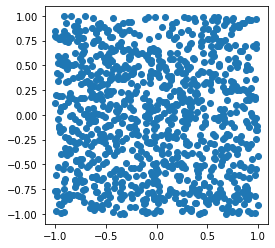

In [189]:
n_square = 1000
x = np.random.uniform(-1,1, size=n_square)
y = np.random.uniform(-1,1, size=n_square)

plt.figure(figsize=(4,4))
plt.scatter(x,y)

In [190]:
r = np.sqrt(x**2 + y**2)

In [193]:
np.sum([True,False,True])

2

In [171]:
n_circ = np.sum(r < 1.0)

In [173]:
estimate_pi = n_circ/n_square*4
print(estimate_pi)

3.096


In [188]:
n_square = 1000000 # From 1000 to 100000000

x = np.random.uniform(-1, 1, n_square)
y = np.random.uniform(-1, 1, n_square)

radius = np.sqrt(x**2 + y**2)

n_circle = np.sum(radius <= 1.0)

print(4 * n_circle / n_square)

3.14484


## Zadanie 2.

1. Wylosuj 100000 próbek z rozkładu Gaussa, o średniej $\mu = 2$ i odchyleniu standardowym $\sigma = 3$.
2. Oblicz średnią i odchylenie standardowe w wylosowanej próbie.
3. Jaki procent próbek znajduje się poza przedziałem $[\mu - \sigma, \mu + \sigma]$?
4. Ile próbek jet większych od zera $> 0$?
5. Wyznacz odchylenie standardowe i średnią dla próbek ${} > 0$


In [194]:
y = np.random.normal(2, 3, 10000)

Wizualne sprawdzenie

In [195]:
x = np.linspace(-20,20, 1000)

In [196]:
def gaussian(x, mu, sigma):
    return((1./(sigma*np.sqrt(2*math.pi)))*np.exp(-(x-mu)**2/(2*sigma**2)))

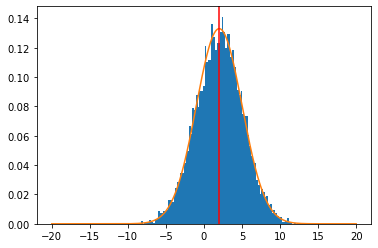

In [197]:
plt.hist(y, bins=100, density=True)
plt.plot(x, gaussian(x,2,3))
plt.axvline(x=2,color='r');

## Zadanie 3.

Propagowanie błędu wykorzytując metodę Monte Carlo. 

* Stała Hubble'a zmierzona przez PLANCKa to
$$
H_0 = (67.74 \pm 0.47)\,\frac{\mathrm{km}}{\mathrm{s}\cdot\mathrm{Mpc}}
$$

* Wyznacz średnią i niepewność wyznaczenia prędkości galaktyki, w przypadku której zmierzona odległość to $(500 \pm 100)\,\mathrm{Mpc}$ wykorzystując metodę Monte Carlo.

$$
v = H_0 * d
$$

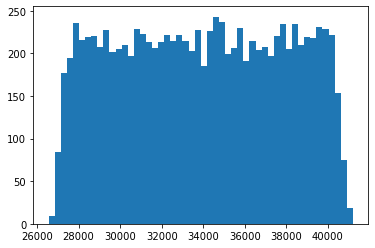

In [207]:
N = 10000
H0s = np.random.normal(67.74,0.47,size=N)
ds = np.random.uniform(400,600,size=N)
vs = ds*H0s
plt.hist(vs,bins=50);

In [203]:
np.min(vs), np.max(vs)

(26896.59809601848, 34130.24604760332)

### Proste IO

In [ ]:
idx = np.arange(100)
x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 1, 100)
n = np.random.poisson(20, 100)

In [ ]:
idx.shape, x.shape, y.shape, n.shape

In [ ]:
np.savetxt(
    'data.csv',
    np.column_stack([idx, x, y, n]),
)

In [ ]:
!head data.csv

In [ ]:
# Load back the data, unpack=True is needed to read the data columnwise and not row-wise
idx, x, y, n = np.genfromtxt('data.csv', unpack=True)

idx.dtype, x.dtype

### Problemy

* Wszystko jest float'em
* Dużo większy rozmiar niż konieczny, ponieważ wszystko jest zapisywane jako float
* Brak nazw kolumn

## Numpy recarrays

* Numpy recarrays mogą posidać kolumny róznych typów
* Do kolejnych wierszy dostęp uzysujemy przez indeks
* Do kolumn dostajemy dostęp przez nagłówki

Rozwiązanie problemu → Nazwy kolumn, różne typy

In [ ]:
data = np.savetxt(
    'data.csv',
    np.column_stack([idx, x, y, n]),
    delimiter=',', # true csv file
    header=','.join(['idx', 'x', 'y', 'n']),
    fmt=['%d', '%.4g', '%.4g', '%d'],
)

In [ ]:
!head data.csv

In [ ]:
data = np.genfromtxt(
    'data.csv',
    names=True, # load column names from first row
    dtype=None, # Automagically determince best data type for each column
    delimiter=',',
)

In [ ]:
data[0]

In [ ]:
data['x']

In [ ]:
data.dtype

## Algebra liniowa

Numpy zapewnia dostęp do wielu operacji algebry liniowej, główne jako wrapper  [LAPACK](http://www.netlib.org/lapack/)

In [208]:
# symmetrix matrix, use eigh
mat = np.array([
    [4, 2, 0],
    [2, 1, -3],
    [0, -3, 4]
])

eig_vals, eig_vecs = np.linalg.eig(mat)

eig_vals, eig_vecs

(array([-1.40512484,  4.        ,  6.40512484]),
 array([[ 3.07818468e-01,  8.32050294e-01, -4.61454330e-01],
        [-8.31898624e-01, -1.93604245e-16, -5.54927635e-01],
        [-4.61727702e-01,  5.54700196e-01,  6.92181495e-01]]))

In [209]:
np.linalg.inv(mat)

array([[ 0.13888889,  0.22222222,  0.16666667],
       [ 0.22222222, -0.44444444, -0.33333333],
       [ 0.16666667, -0.33333333, -0.        ]])

## Typ danych - Macierz

In [ ]:
mat = np.matrix(mat)

In [ ]:
mat.T

In [ ]:
mat * mat

In [ ]:
mat * 5

In [ ]:
mat.I

In [ ]:
mat * np.matrix([1, 2, 3]).T

#### Rozwiązanie zadania 1.

In [ ]:
def linear_regression(x, y):

    cov_matrix = np.cov(x, y)
    a = cov_matrix[0, 1] / cov_matrix[0, 0]
    b = np.mean(y) - a * np.mean(x)

    return a, b

#### Rozwiązanie zadania 2.

In [ ]:
import numpy as np

numbers = np.random.normal(2, 3, 10000)

print('mean:', np.mean(numbers))
print('std:', np.std(numbers))

mask = np.logical_or(numbers <= -1, numbers >= 5)

print('Outside 1 sigma:', len(numbers[mask]) / len(numbers))

mask = numbers >= 0

print('n>0:', len(numbers[mask]))
print('mean, where x > 0:', np.mean(numbers[mask]))
print('std, where x > 0:', np.std(numbers[mask]))

#### Rozwiązanie zadania 3.

In [ ]:
import numpy as np

n = 100000
h0 = np.random.normal(67.74, 0.47, n)
distance = np.random.normal(500, 100, n)

velocity = np.mean(h0 * distance)
velocity_unc = np.std(h0 * distance)

print('({:.0f} ± {:.0f}) km/s'.format(velocity, velocity_unc))